In [29]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
import matplotlib.colors as mcolors

In [30]:
ROOT_PATH = "../../../desarrollo/"

csv_file = ROOT_PATH + "Data/Annotations/audio_annotations.csv"

audio_name = "AM8_20230303_063000.WAV"

In [31]:
# Load image from audio
image_name = audio_name.replace(".WAV", "")

# Define the root path for the Images directory
image_root_directory = ROOT_PATH + "Data/Dataset/images/"

In [32]:
# Read the CSV file
df = pd.read_csv(csv_file)

# Filter rows that match the given audio name
filtered_df = df[df['path'].str.contains(audio_name)]

# Delete indexes from the filtered dataframe
filtered_df.reset_index(drop=True, inplace=True)

In [33]:
filtered_df

,path,annotator,recorder,date,time,audio_duration,start_time,end_time,low_frequency,high_frequency,specie
0,AM8/2023_03_03/AM8_20230303_063000.WAV,Edu,AM8,2023/03/03,06:30:00,00:01:00,31.955773,35.720850,792.825378,5656.726074,ukn
1,AM8/2023_03_03/AM8_20230303_063000.WAV,Edu,AM8,2023/03/03,06:30:00,00:01:00,29.043653,31.154509,1103.357178,3842.828613,ukn
2,AM8/2023_03_03/AM8_20230303_063000.WAV,Edu,AM8,2023/03/03,06:30:00,00:01:00,27.053418,28.845491,3060.569336,3842.828613,cettia cetti
3,AM8/2023_03_03/AM8_20230303_063000.WAV,Edu,AM8,2023/03/03,06:30:00,00:01:00,21.056864,24.951177,588.767822,1524.711792,ciconia ciconia
4,AM8/2023_03_03/AM8_20230303_063000.WAV,Edu,AM8,2023/03/03,06:30:00,00:01:00,19.040781,20.496841,2102.753662,4787.809570,ukn
5,AM8/2023_03_03/AM8_20230303_063000.WAV,Edu,AM8,2023/03/03,06:30:00,00:01:00,14.198736,15.749569,6213.696777,7478.315430,regulus ignicapilla
6,AM8/2023_03_03/AM8_20230303_063000.WAV,Edu,AM8,2023/03/03,06:30:00,00:01:00,37.542857,38.254286,2102.753662,3656.001221,unknown
7,AM8/2023_03_03/AM8_20230303_063000.WAV,Edu,AM8,2023/03/03,06:30:00,00:01:00,38.874210,40.838599,6979.027344,8974.252930,cettia cetti
8,AM8/2023_03_03/AM8_20230303_063000.WAV,Edu,AM8,2023/03/03,06:30:00,00:01:00,40.700747,41.950029,3842.828613,7478.315430,unknown
9,AM8/2023_03_03/AM8_20230303_063000.WAV,Edu,AM8,2023/03/03,06:30:00,00:01:00,42.027570,42.820218,1823.416382,1876.962524,unknown


In [34]:
# Function to convert HH:MM:SS format to seconds
def hms_to_seconds(hms):
    if isinstance(hms, str):
        time_parts = hms.split(':')
        if len(time_parts) == 3:
            hours, minutes, seconds = map(int, time_parts)
            total_seconds = hours * 3600 + minutes * 60 + seconds
            return total_seconds
    elif isinstance(hms, float):
        return float(hms)
    return None

In [35]:
filtered_df["path"][0].replace(".WAV", ".PNG")

'AM8/2023_03_03/AM8_20230303_063000.PNG'

In [36]:
image_path = ROOT_PATH + "Data/Dataset/images/"
print(image_path)

../../../desarrollo/Data/Dataset/images/


AM8_20230303_063000.WAV


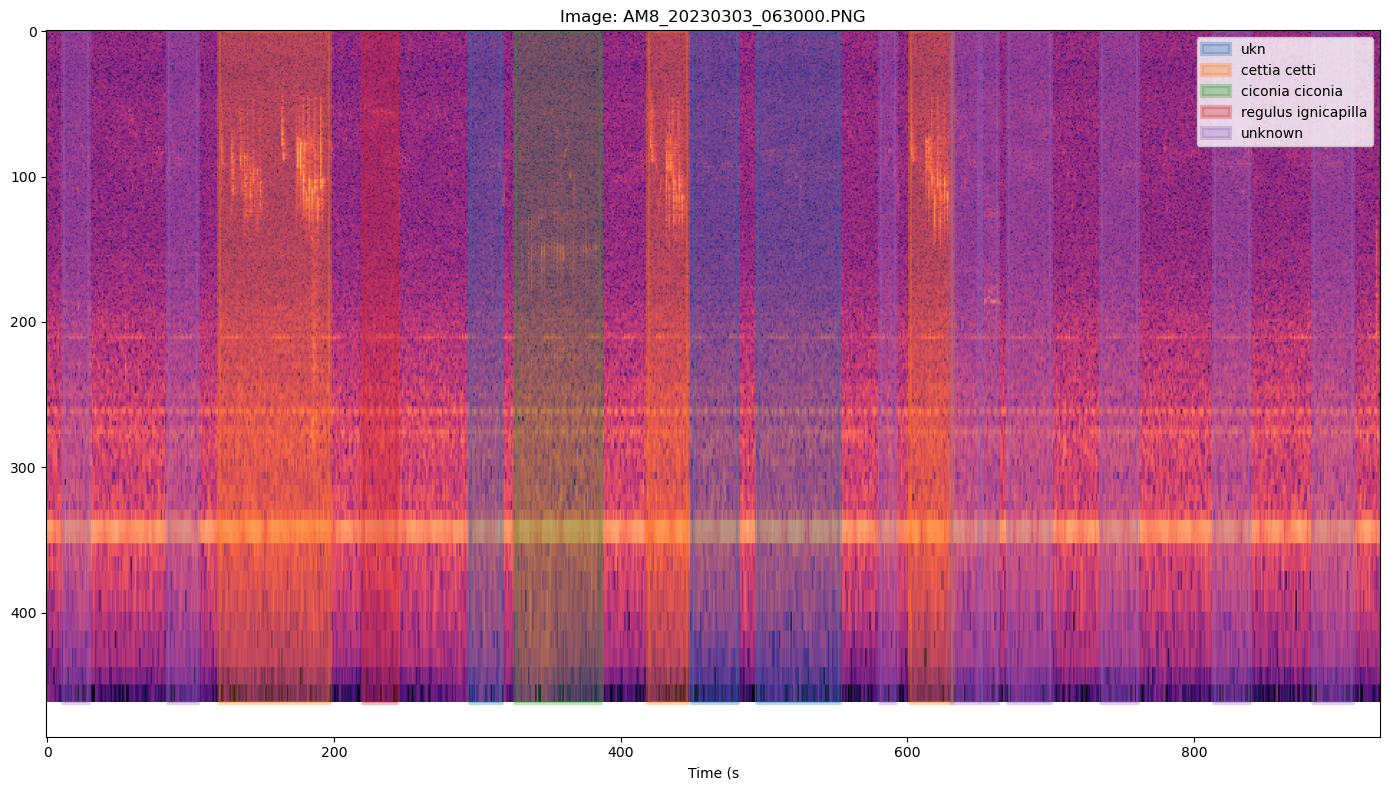

Image shape: (462, 930, 4)
Image size: 607 KB
Image resolution: 1400x800 pixels


In [37]:
# Function to load and display audio images with annotations
def load_and_display_image(image_path, annotations_df):
    # Load the audio image
    img = plt.imread(image_path)
    
    # Create a figure and axis for the image
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Display the audio image
    ax.imshow(img, aspect='auto')
    ax.set_title(f'Image: {os.path.basename(image_path)}')
    
    # Load the corresponding annotations from the DataFrame
    audio_name = os.path.splitext(os.path.basename(image_path))[0] + '.WAV'
    print(audio_name)
    filtered_df = annotations_df[annotations_df['path'].str.contains(audio_name)]
    
    # Convert audio_duration to seconds
    audio_duration = hms_to_seconds(filtered_df['audio_duration'].values[0])
    
    # Create a dictionary to map labels to colors
    label_to_color = {}
    
    # Add annotation boxes to the image with the same color for labels with the same name
    for index, row in filtered_df.iterrows():
        start_time = hms_to_seconds(row['start_time'])
        end_time = hms_to_seconds(row['end_time'])
        if start_time is not None and end_time is not None:
            start = int(start_time / audio_duration * img.shape[1])
            end = int(end_time / audio_duration * img.shape[1])
            label = row['specie']
            if label not in label_to_color:
                label_to_color[label] = list(mcolors.TABLEAU_COLORS.values())[len(label_to_color) % len(mcolors.TABLEAU_COLORS)]
            color = label_to_color[label]
            ax.fill_betweenx(y=[0, img.shape[0]], x1=start, x2=end, alpha=0.3, label=label, color=color, linewidth=3)

    # Configure plot settings
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc="best")
    #ax.legend(loc='best')
    ax.set_xlabel('Time (s')

    # Show the plot
    plt.tight_layout()
    plt.show()

    # Print image compression
    print(f'Image shape: {img.shape}')
    print(f'Image size: {os.path.getsize(image_path) / 1024:.0f} KB')

    # Print images resolution
    dpi = fig.get_dpi()
    width, height = fig.get_size_inches()
    print(f'Image resolution: {width * dpi:.0f}x{height * dpi:.0f} pixels')

image_path = ROOT_PATH + "Data/Dataset/images/" + filtered_df["path"][0].replace(".WAV", ".PNG")
load_and_display_image(image_path, df)


In [38]:
'''sample_audio = ROOT_PATH + "Data/Dataset/Audios/" + filtered_df["path"][0]

# Cargar el archivo de audio y obtener la frecuencia de muestreo
y, sr = librosa.load(sample_audio, sr=None)

# Imprimir la frecuencia de muestreo
print("Frecuencia de muestreo:", sr, "Hz")'''

MIN_FREQUENCY = 1
MAX_FREQUENCY = 16000

In [39]:
image_path = ROOT_PATH + "Data/Dataset/images/" + filtered_df["path"][0].replace(".WAV", ".PNG")
img = plt.imread(image_path)
print(img.shape[0])

462


495 553 49.622354782564344 143.4029974118327
450 482 68.07480849869364 127.6292267082398
419 447 68.07480849869364 78.93751997097428
326 386 112.19248956356415 157.60474868238987
295 317 57.581657932710755 96.8514680357693
220 244 36.29917474226801 45.140411497701734
581 592 70.45339043058794 96.8514680357693
602 632 27.596313930316057 39.59691657645237
630 650 36.29917474226801 68.07480849869364
651 663 102.27275764950912 103.65407505717849
735 761 55.29128309998964 74.05764189033448
814 839 50.749971405412566 51.88059184315364
883 911 62.20548586366942 105.0465753995183
120 197 72.85118793987942 85.17205228995158
11 29 64.54059990551406 71.64980877832011
670 700 54.151168976545364 65.71435499187669
84 105 56.43475255301934 75.26935130690259


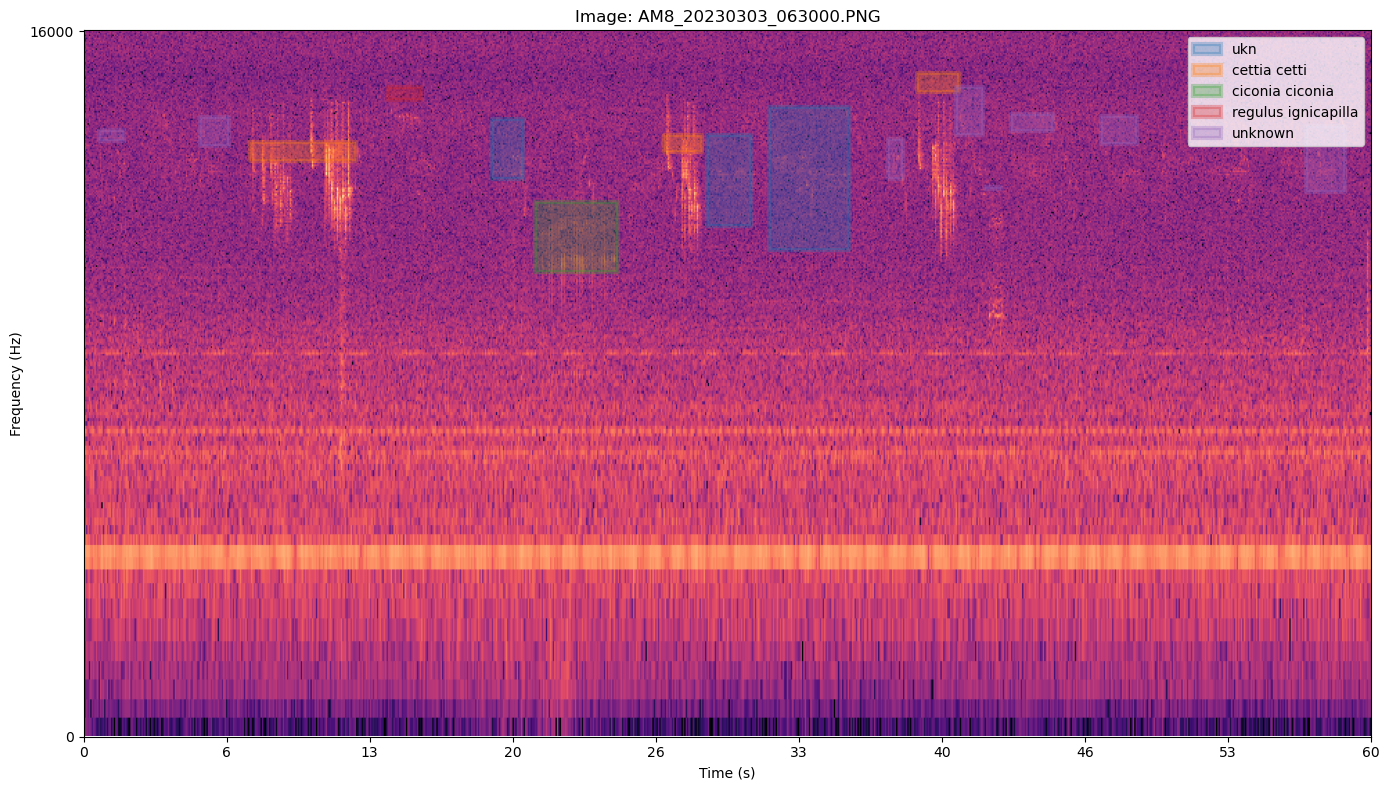

In [41]:
import numpy as np
import math

# Load and display audio images with annotations
def load_and_display_image(image_path, annotations_df):
    # Load the audio image
    img = plt.imread(image_path)
    
    # Create a figure and axis for the image
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Display the audio image
    ax.imshow(img, aspect='auto')
    ax.set_title(f'Image: {os.path.basename(image_path)}')
    
    # Load the corresponding annotations from the DataFrame
    audio_name = os.path.splitext(os.path.basename(image_path))[0] + '.WAV'
    filtered_df = annotations_df[annotations_df['path'].str.contains(audio_name)]
    
    # Convert audio_duration to seconds
    audio_duration = hms_to_seconds(filtered_df['audio_duration'].values[0])
    
    # Create a dictionary to map labels to colors
    label_to_color = {}
    
    # Add annotation boxes to the image with the same color for labels with the same name
    for index, row in filtered_df.iterrows():
        start_time = hms_to_seconds(row['start_time'])
        end_time = hms_to_seconds(row['end_time'])
        low_frequency = row['low_frequency']
        high_frequency = row['high_frequency']
        if start_time is not None and end_time is not None:
            start = int(start_time / audio_duration * img.shape[1])
            end = int(end_time / audio_duration * img.shape[1])

            # Calculate vertical coordinates based on frequency range (0 to MAX_FREQUENCY)
            if low_frequency == 0:
                bottom = 0
            else:
                # bottom = float(((2595 * math.log(1 + (low_frequency/700), 10))) * img.shape[0])
                bottom = float(np.log(low_frequency) / np.log(MAX_FREQUENCY) * img.shape[0])

            if high_frequency == MAX_FREQUENCY:
                top = MAX_FREQUENCY
            else:
                # top = float(((2595 * math.log(1 + (high_frequency/700), 10))) * img.shape[0])
                top = float(np.log(high_frequency) / np.log(MAX_FREQUENCY) * img.shape[0])

            # Invert the y-coordinates
            bottom, top = img.shape[0] - top, img.shape[0] - bottom

            label = row['specie']
            if label not in label_to_color:
                label_to_color[label] = list(mcolors.TABLEAU_COLORS.values())[len(label_to_color) % len(mcolors.TABLEAU_COLORS)]
            color = label_to_color[label]
            ax.fill_betweenx(y=[bottom, top], x1=start, x2=end, alpha=0.3, label=label, color=color, linewidth=3)

            print(start, end, bottom, top)
    
    # Configure plot settings
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc="best")
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Frequency (Hz)')

    # Customize y-axis ticks and labels for frequency
    freq_ticks = [0, MAX_FREQUENCY]
    freq_labels = [str(tick) for tick in freq_ticks]
    ax.set_yticks([int(tick / MAX_FREQUENCY * img.shape[0]) for tick in freq_ticks])
    ax.set_yticklabels(np.flipud(freq_labels))  # Invert the frequency labels

    # Customize x-axis
    ax.set_xlim([0, 60])
    ax.set_xticks(np.linspace(0, img.shape[1], num=10))
    ax.set_xticklabels([str(int(tick / img.shape[1] * audio_duration)) for tick in ax.get_xticks()])

    # Show the plot
    plt.tight_layout()
    plt.show()

image_path = ROOT_PATH + "Data/Dataset/images/" + filtered_df["path"][0].replace(".WAV", ".PNG")
load_and_display_image(image_path, df)


In [96]:
# List image files in the Images directory
image_files = [os.path.join(image_root_directory, file) for file in os.listdir(image_root_directory) if file.endswith('.jpg')]

# Display each image along with annotations
for image_path in image_files:
    load_and_display_image(image_path, df)